<a href="https://colab.research.google.com/github/ceyxasm/ml/blob/main/Unsupervized_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K_MEANS CLUSTERING**

In [ ]:

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:] # petal length and width

from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

print(kmeans.cluster_centers_)


[[1.462      0.246     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]


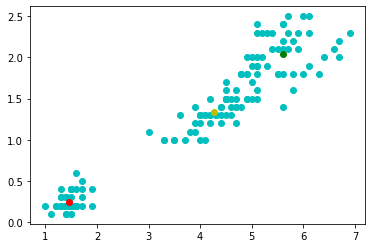

In [ ]:
import matplotlib.pyplot as plt
x=X[:,0]
y=X[:,1]
plt.scatter(x,y, color='c')
c=['r', 'g', 'y']
for i in range(3):
  plt.plot([kmeans.cluster_centers_[i][0]], [kmeans.cluster_centers_[i][1]], 'ro', color=c[i])

plt.show()

In [ ]:
# it can also be used to convert a high-dimensional dataset to a k-dimensional one
X_new=[[1,1], [2,2], [5,2]]
print(kmeans.predict(X_new))
print(kmeans.transform(X_new))

[0 0 1]
[[0.88428502 4.71148493 3.28710273]
 [1.83465528 3.59602887 2.36261877]
 [3.94891884 0.59701224 0.98314945]]


In [ ]:
'''distance of each new point from the pre-existing cluster ^^^^^^'''
kmeans.inertia_ #this is the mean squared distance between each instance and its closest centroid.
##not a good metric for selecting k

31.37135897435897

In [ ]:
#if dataset is huge, data can be fed in mini batches;
#this can be done as
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=3)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=3)

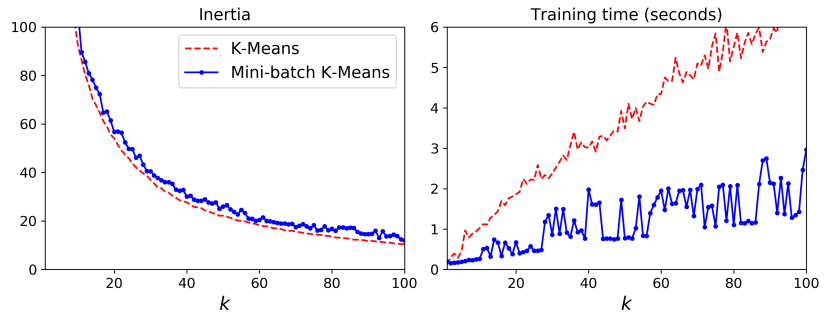

In [ ]:
'''to calculate optimal value of k, we can use use the sil‐
houette score, which is the mean silhouette coefficient over all the instances'''

from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.6604800083974887

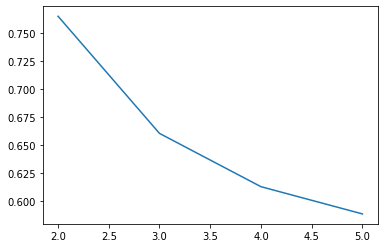

In [ ]:
'''for different values of k, we take one with max. score'''
x=[2,3,4,5]
score=[]
for i in x:
  kmeans=KMeans(n_clusters= i)
  y_pred=kmeans.fit_predict(X)
  score.append( silhouette_score(X, kmeans.labels_))

plt.plot(x, score)
plt.show()

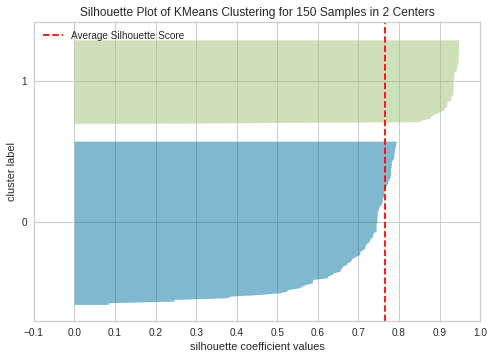

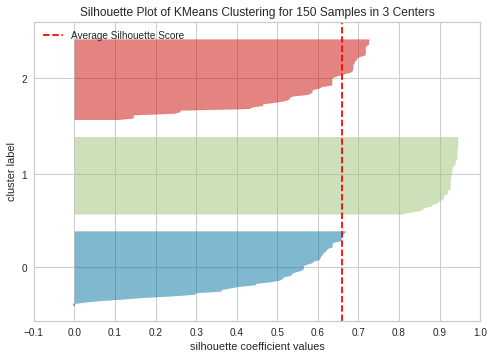

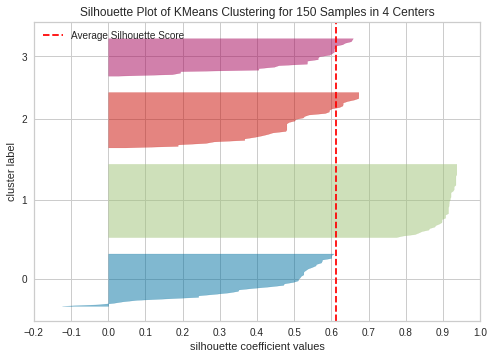

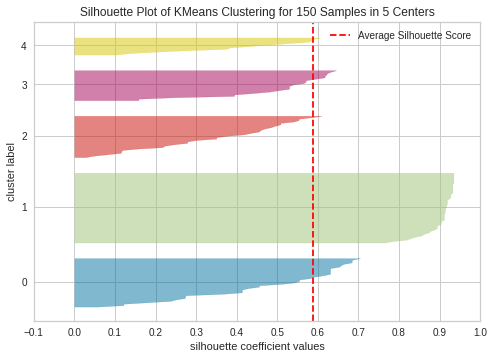

In [ ]:
## further we can use a Silhouette Vizaulizer
from yellowbrick.cluster import silhouette_visualizer

for i in x:
  silhouette_visualizer(KMeans(i, random_state=42), X, colors='yellowbrick')

**Limits of K_Means**
* needs to be run many times to avoid sub-optimal sol
* K-Means does not behave very well when the clusters have varying sizes,
different densities, or non-spherical shapes

uses of clustering
# **Image Segmentation**

In [ ]:
import os
from matplotlib.image import imread # you could also use `imageio.imread()`
image = imread(os.path.join("/content/me.jpg"))
image.shape

(612, 585, 3)

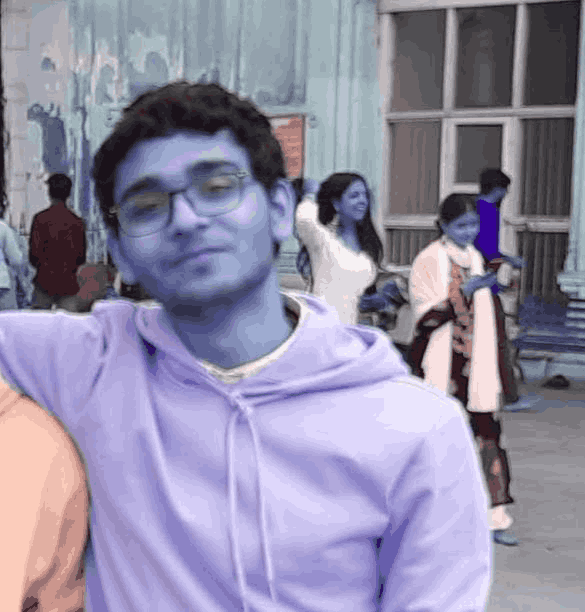

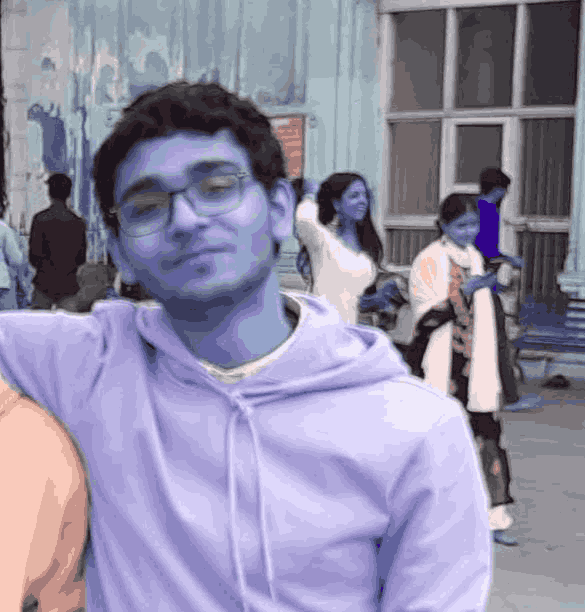

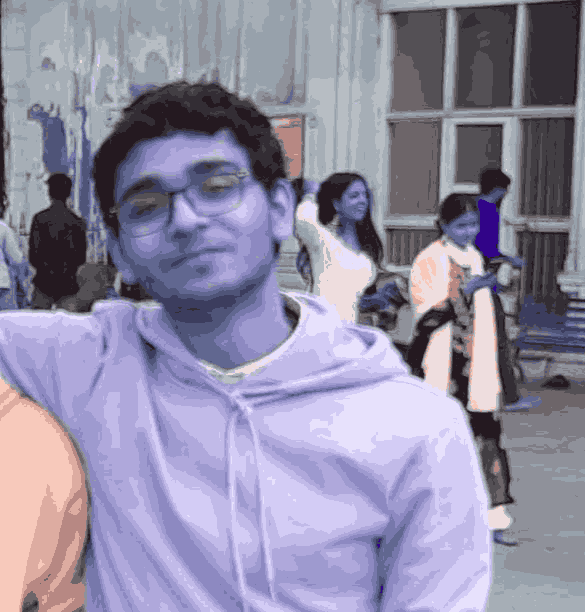

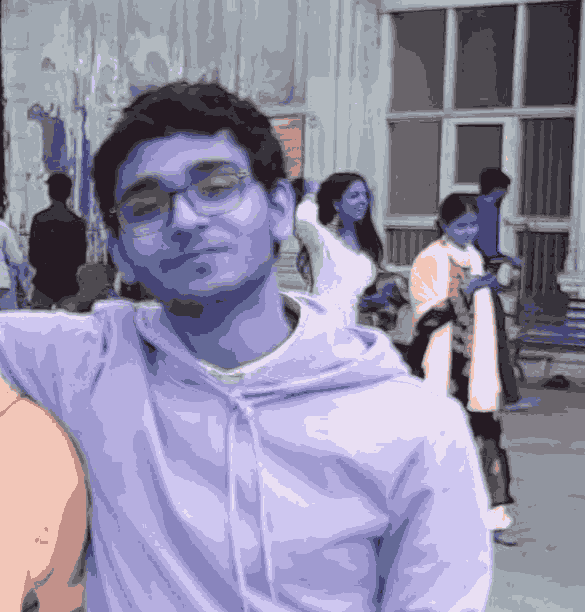

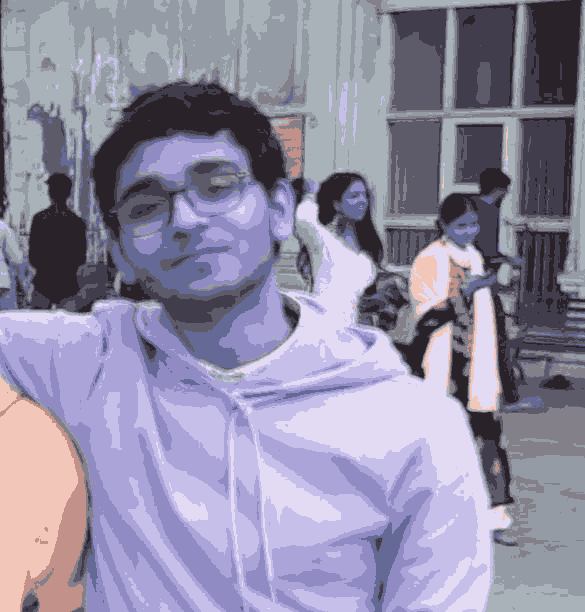

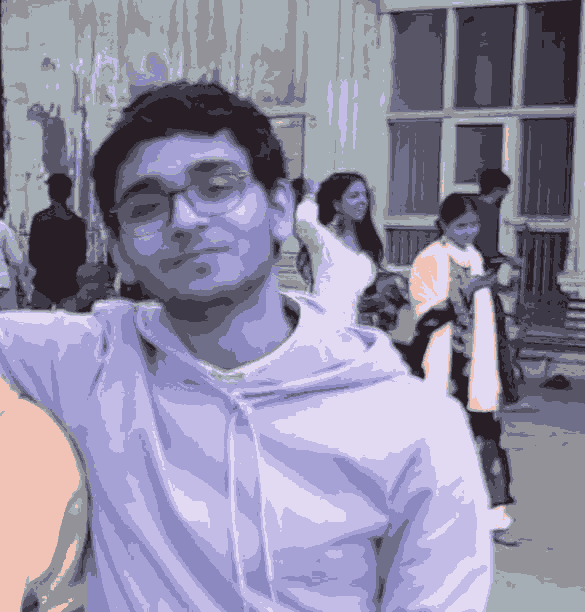

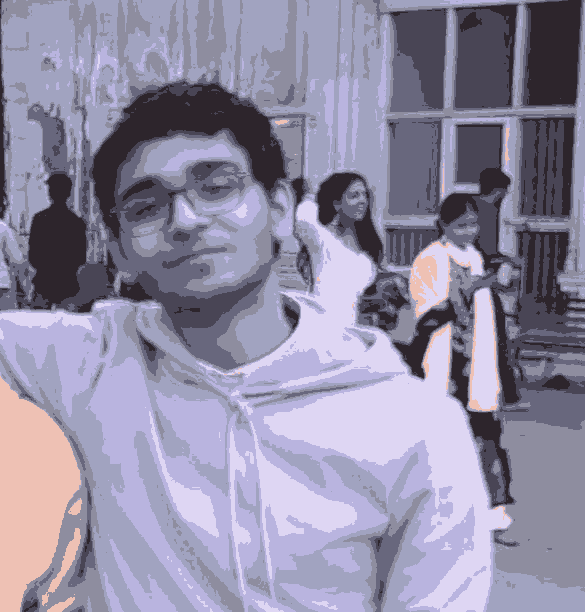

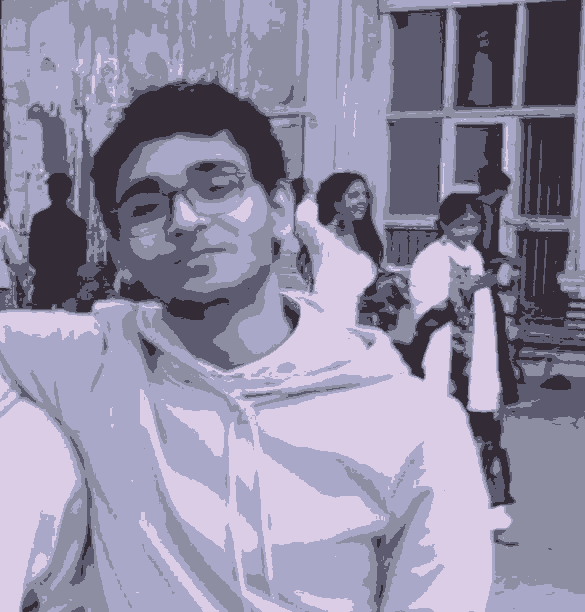

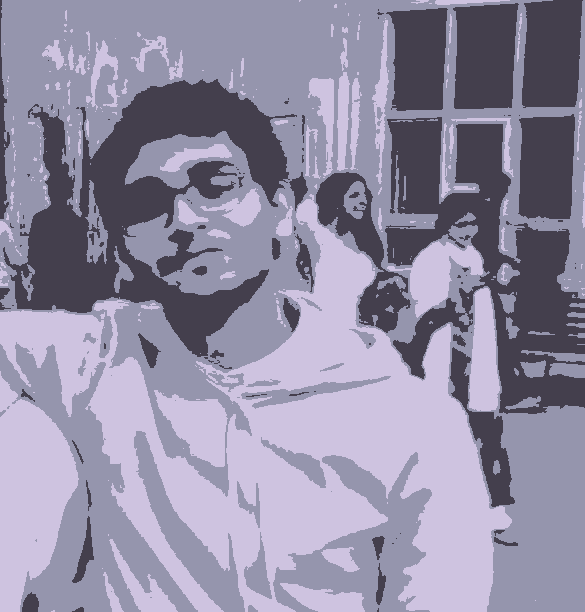

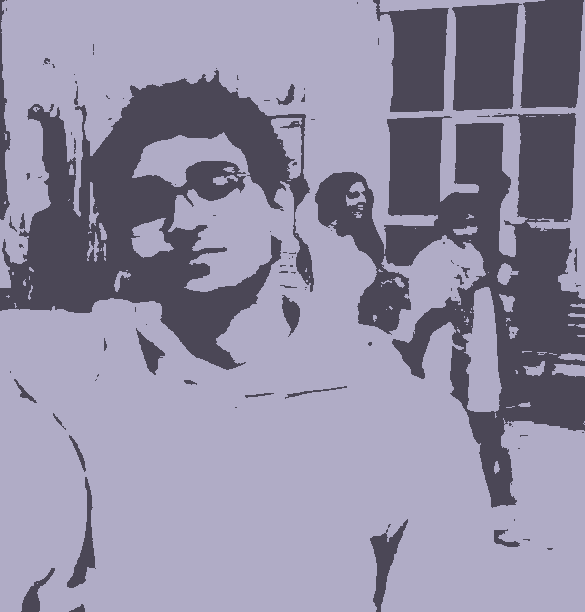

In [ ]:
from google.colab.patches import cv2_imshow

X = image.reshape(-1, 3)
level=[70, 40, 25, 17, 13, 11, 8, 5 ,3, 2]
for i in level:
  kmeans = KMeans(n_clusters=i).fit(X)
  segmented_img = kmeans.cluster_centers_[kmeans.labels_]
  segmented_img = segmented_img.reshape(image.shape)
  cv2_imshow( segmented_img)
  cv2.waitKey(0)

# **Pre-processing**

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_digits, y_digits= load_digits(return_X_y= True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

#fiting a model without pre-processing
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42, max_iter=5000)
log_reg.fit(X_train, y_train)
print(log_reg.score(X_test, y_test))

0.9666666666666667


In [ ]:
'''We will create a pipeline that will first cluster the
training set into 50 clusters and replace the images with their distances to these 50
clusters, then apply a logistic regression model.

also note, we are making 50 clusters and not 10'''

from sklearn.pipeline import Pipeline
pipeline = Pipeline([
("kmeans", KMeans(n_clusters=50)),
("log_reg", LogisticRegression(max_iter=1000)),
])
pipeline.fit(X_train, y_train)

print(pipeline.score(X_test, y_test))

0.9777777777777777


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
'''and since k maens in now part of pipeline, value of k can be found much easily'''
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)


In [ ]:
print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test))

{'kmeans__n_clusters': 87}
0.9777777777777777


In [ ]:
'''
>further:
>>explore clustering for semi-supervised tasks
>>explore active learning
>>Agglomerative clustering
>>Birch
>>Mean-shift
>>Affinity propogation
>>Spectral CLustering
>>>Gaussian Mixtures'''

'\n>further:\n>>explore clustering for semi-supervised tasks\n>>explore active learning'